In [3]:
import numpy as np
import sys
import lal
import lalsimulation

ImportError: No module named pylal

In [4]:
def get_snr(data, T_obs, fs, psd):
    """
    computes the snr of a whitened signal in unit variance time domain noise
    """

    N = T_obs * fs
    df = 1.0 / T_obs
    dt = 1.0 / fs

    win = tukey(N, alpha=1.0 / 8.0)
    idx = np.argwhere(psd == 0.0)
    psd[idx] = 1e300

    xf = np.fft.rfft(data * win) * dt
    SNRsq = 4.0 * np.sum((np.abs(xf) ** 2) / psd) * df
    return np.sqrt(SNRsq)

In [60]:
# define distribution params
m_min = 5.0
M_max = 100.0
approximant = lalsimulation.IMRPhenomD
dist = 1e6 * lal.PC_SI  # put it as 1 MPc
overlap = 0.03 # overlap percentage
N_tmp = 1000
f_low = 40
log_m_max = np.log(M_max - m_min)

flag = False

tau_list = []

# iterate through number of templates desired
# should replace with while loop
# while loop should stop once bank is fully 
# saturated
tau0 = []
tau3 = []
for i in xrange(N_tmp):
    while not flag:
        m12 = np.exp(np.log(m_min) + np.random.uniform(0, 1, 2) * (log_m_max - np.log(m_min)))
        #m12 = m_min + np.random.uniform(0, 1, 2) * (M_max - m_min)
        flag = True if (np.sum(m12) < M_max) and (np.all(m12 > m_min)) and (m12[0] >= m12[1]) else False
    eta = m12[0] * m12[1] / (m12[0] + m12[1]) ** 2
    mc = np.sum(m12) * eta ** (3.0 / 5.0)
    # define tau variables
    tau0.append(np.divide(5,256*3.14*f_low*eta) * np.divide(3.14*(6.674*10**11)*mc*f_low,(3*10**8))**(-5./3))
    tau3.append(np.divide(5,8*f_low*eta) * np.divide(3.14*(6.674*10**11)*mc*f_low,(3*10**8))**(-2./3))

-31.208641783169192

In [30]:
# define distribution params
tau0_min = 1
tau0_max = 45
tau3_min = 0.2
tau3_max = 1.4
approximant = lalsimulation.IMRPhenomD
dist = 1e6 * lal.PC_SI  # put it as 1 MPc
overlap = 0.03 # overlap percentage
N_tmp = 1000

flag = False

tau_list = []

# iterate through number of templates desired
# should replace with while loop
# while loop should stop once bank is fully 
# saturated
tau0 = []
tau3 = []
for i in xrange(N_tmp):
    #tau0.append(np.exp(np.log(tau0_min) + np.random.uniform(0, 1, 2) * (np.log(tau0_max))))
    #tau3.append(np.exp(np.log(tau3_min) + np.random.uniform(0, 1, 2) * (np.log(tau3_max))))
    tau0.append(tau0_min + np.random.uniform(0, 1, 2) * tau0_max)
    tau3.append(tau3_min + np.random.uniform(0, 1, 2) * tau3_max)
    

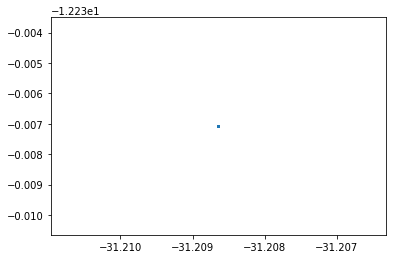

In [64]:
import matplotlib.pyplot as plt
plt.scatter(np.log(tau0),np.log(tau3),s=2)
plt.show()
plt.close()